<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [2]:
import urllib.request

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite"
urllib.request.urlretrieve(url, "survey-data.sqlite")

('survey-data.sqlite', <http.client.HTTPMessage at 0x12040b610>)

In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

zsh:1: command not found: wget


#### Install the required libraries and import them


In [3]:
!pip install pandas

In [4]:
!pip install matplotlib

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [6]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [7]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [8]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [9]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


In [18]:
table_name = 'main'
column_name = 'CompTotal'

QUERY = f"""
PRAGMA table_info({table_name});
"""
df = pd.read_sql_query(QUERY, conn)

# Filter for the column you care about
column_info = df[df['name'] == column_name]
print(column_info[['name', 'type']])

         name  type
21  CompTotal  REAL


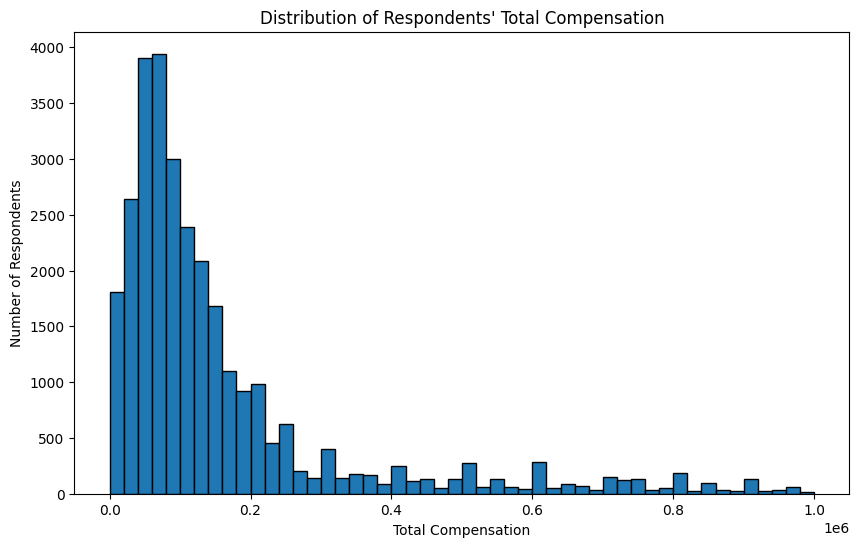

In [10]:
## Write your code here

QUERY = """
SELECT CompTotal
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Step 2: Convert to numeric (forcing errors to NaN)
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")

# Step 3: Drop missing values
df = df.dropna(subset=["CompTotal"])

# Step 4: Remove extreme outliers (optional, makes histogram readable)
df = df[df["CompTotal"] < 1e6]  # keep values below 1,000,000

# Step 5: Plot histogram
plt.figure(figsize=(10,6))
plt.hist(df["CompTotal"], bins=50, edgecolor="black")
plt.title("Distribution of Respondents' Total Compensation")
plt.xlabel("Total Compensation")
plt.ylabel("Number of Respondents")
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


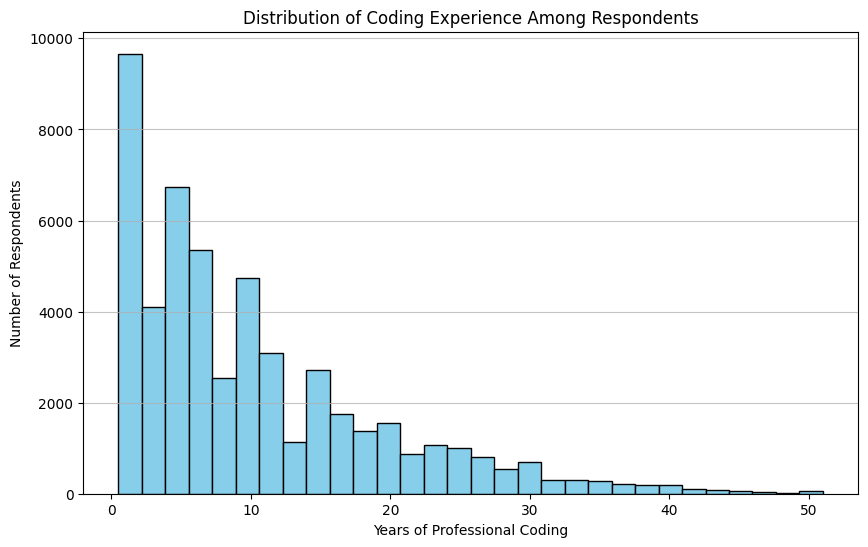

In [11]:
## Write your code here

# Load YearsCodePro column
QUERY = "SELECT YearsCodePro FROM main"
df = pd.read_sql_query(QUERY, conn)

# Map text to numeric
def convert_years(x):
    if x == "Less than 1 year":
        return 0.5
    elif x == "More than 50 years":
        return 51
    elif x == "None" or x is None:
        return None
    else:
        try:
            return float(x)
        except:
            return None

df['YearsCodeProNum'] = df['YearsCodePro'].apply(convert_years)

# Drop missing values
df_clean = df.dropna(subset=['YearsCodeProNum'])

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(df_clean['YearsCodeProNum'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Years of Professional Coding')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Coding Experience Among Respondents')
plt.grid(axis='y', alpha=0.75)
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


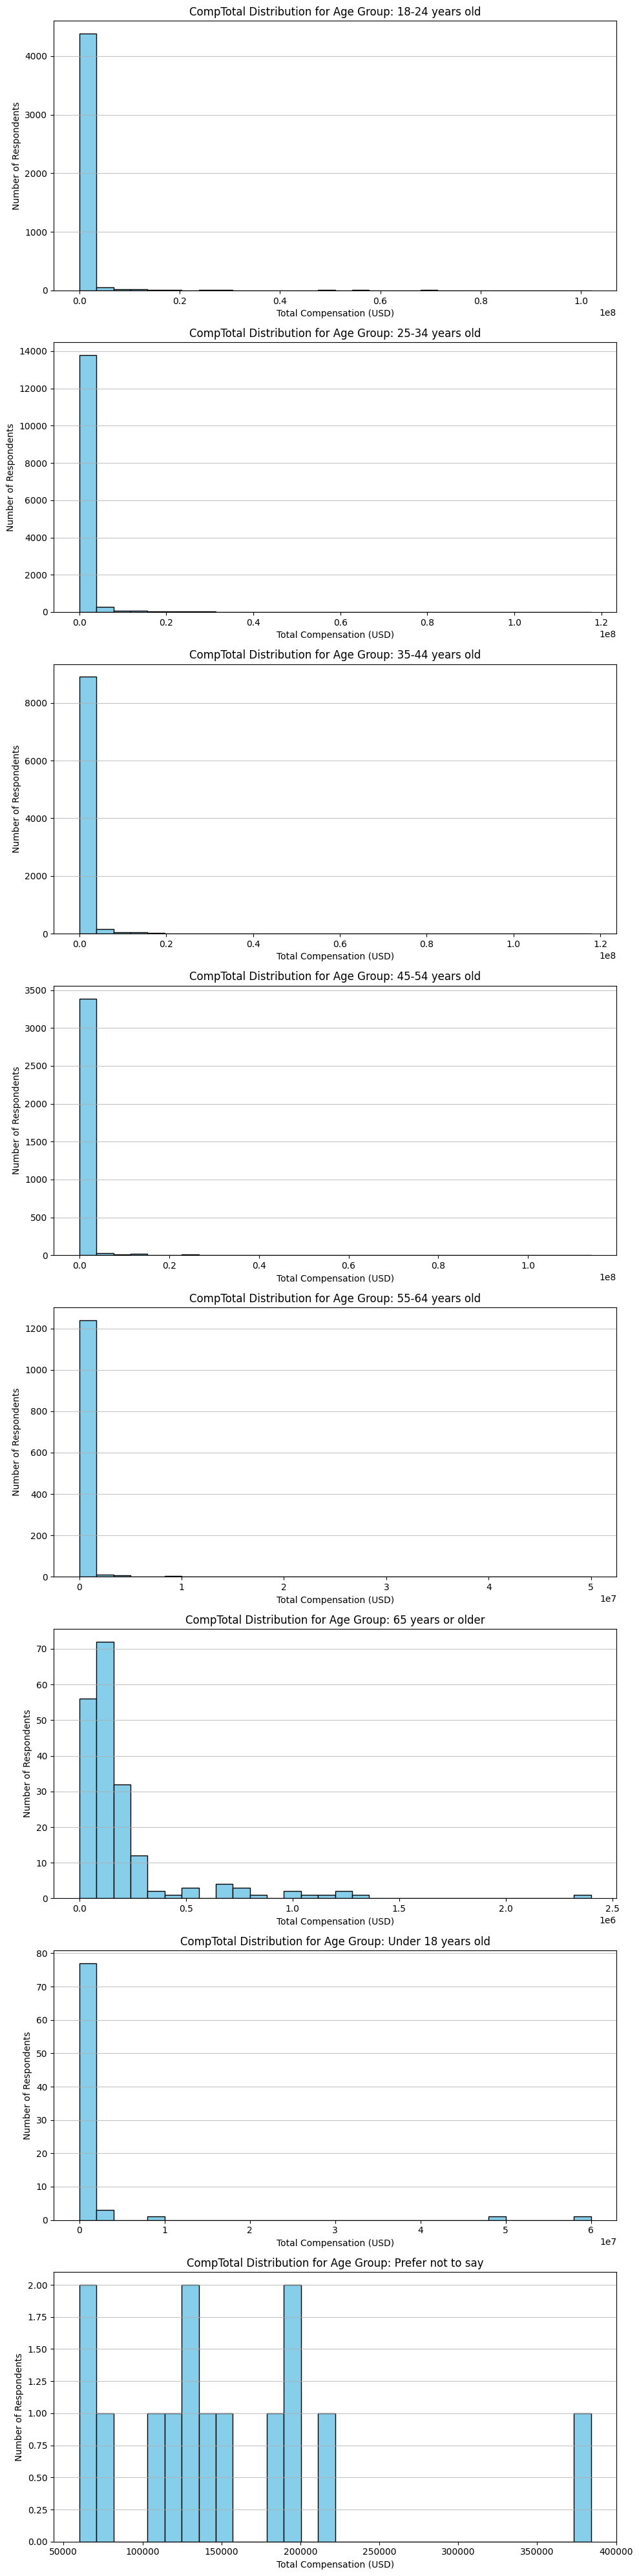

In [12]:

# Load Age and CompTotal
QUERY = "SELECT Age, CompTotal FROM main"
df = pd.read_sql_query(QUERY, conn)

# Drop missing or zero/negative compensation
df_clean = df[df['CompTotal'].notna() & (df['CompTotal'] > 0)]

# Optional: filter extreme outliers to make histogram readable
upper_limit = df_clean['CompTotal'].quantile(0.99)  # 99th percentile
df_clean = df_clean[df_clean['CompTotal'] <= upper_limit]

# Get unique age groups
age_groups = df_clean['Age'].unique()

# Plot histograms for each age group in subplots
fig, axes = plt.subplots(len(age_groups), 1, figsize=(10, 5*len(age_groups)))

for i, age in enumerate(age_groups):
    ax = axes[i] if len(age_groups) > 1 else axes
    data = df_clean[df_clean['Age'] == age]['CompTotal']
    ax.hist(data, bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'CompTotal Distribution for Age Group: {age}')
    ax.set_xlabel('Total Compensation (USD)')
    ax.set_ylabel('Number of Respondents')
    ax.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


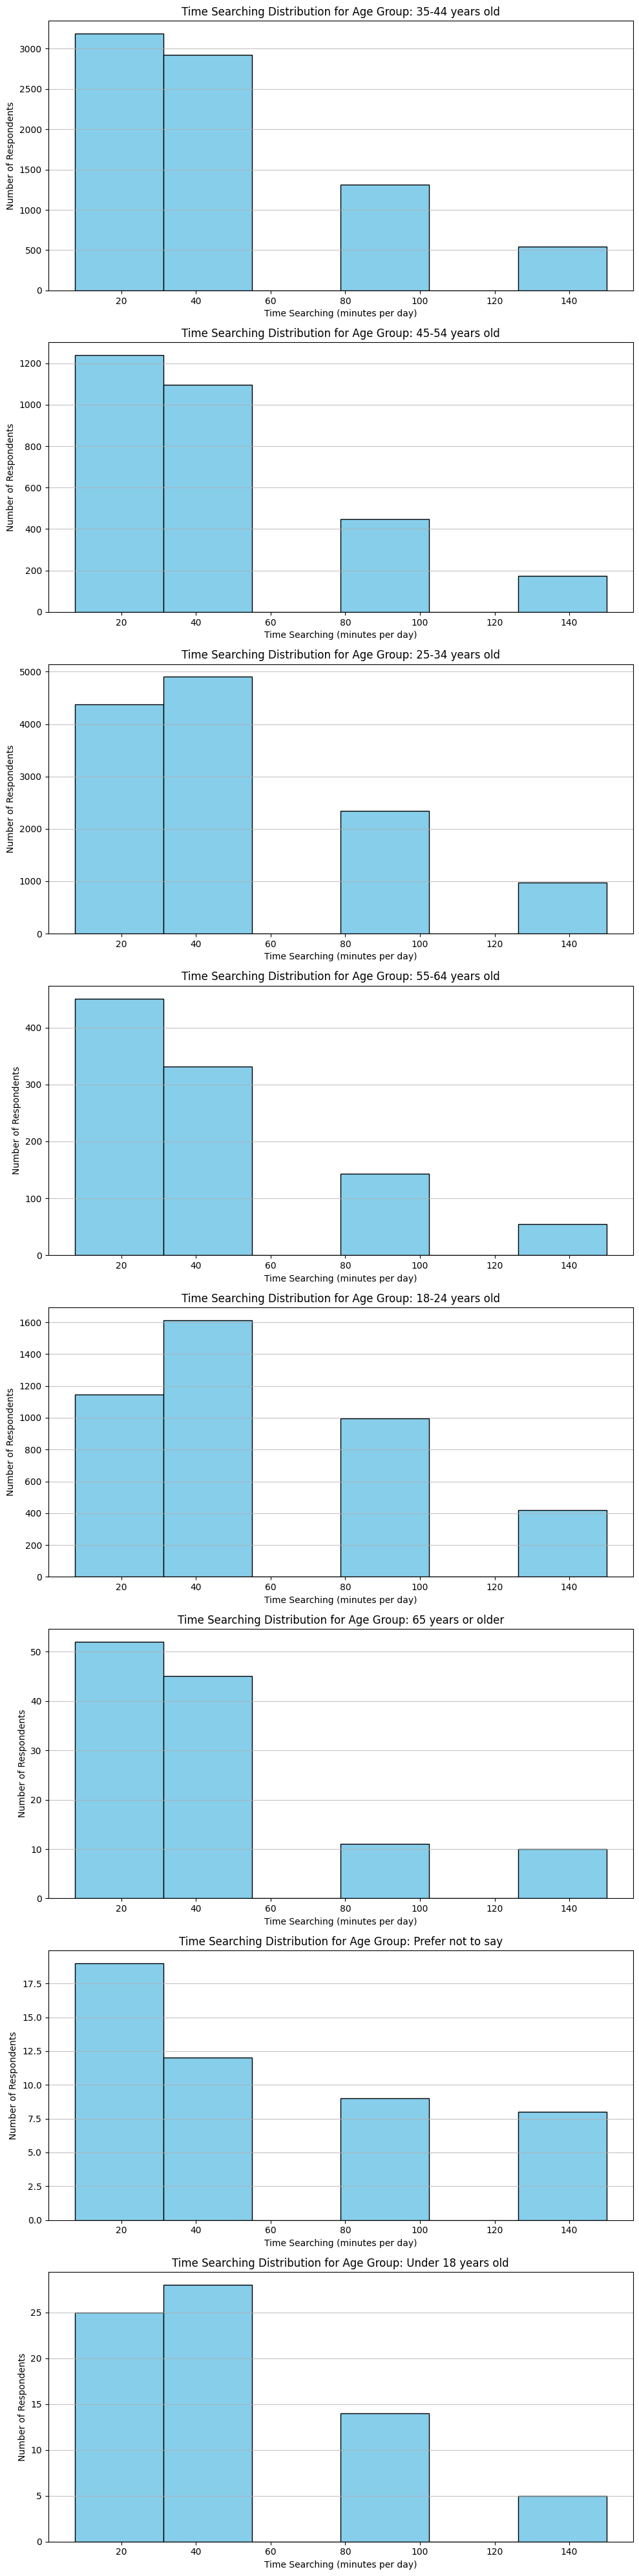

In [13]:
## Write your code here

# Load Age and TimeSearching
QUERY = "SELECT Age, TimeSearching FROM main"
df = pd.read_sql_query(QUERY, conn)

# Drop missing or None entries
df = df[df['TimeSearching'].notna() & (df['TimeSearching'] != "None")]

# Map TimeSearching text to approximate minutes
time_map = {
    "Less than 15 minutes a day": 7.5,
    "15-30 minutes a day": 22.5,
    "30-60 minutes a day": 45,
    "60-120 minutes a day": 90,
    "Over 120 minutes a day": 150
}

df['TimeSearchingMinutes'] = df['TimeSearching'].map(time_map)

# Get unique age groups
age_groups = df['Age'].unique()

# Plot histograms for each age group
fig, axes = plt.subplots(len(age_groups), 1, figsize=(10, 5*len(age_groups)))

for i, age in enumerate(age_groups):
    ax = axes[i] if len(age_groups) > 1 else axes
    data = df[df['Age'] == age]['TimeSearchingMinutes']
    ax.hist(data, bins=6, color='skyblue', edgecolor='black')
    ax.set_title(f'Time Searching Distribution for Age Group: {age}')
    ax.set_xlabel('Time Searching (minutes per day)')
    ax.set_ylabel('Number of Respondents')
    ax.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


In [21]:
QUERY = """
SELECT DatabaseWantToWorkWith 
FROM main 
GROUP BY DatabaseWantToWorkWith 
ORDER BY DatabaseWantToWorkWith
"""
df_want = pd.read_sql_query(QUERY, conn)
print(df_want)

                                 DatabaseWantToWorkWith
0                                                  None
1                                              BigQuery
2                                    BigQuery;Cassandra
3                         BigQuery;Cassandra;Clickhouse
4     BigQuery;Cassandra;Clickhouse;Cloud Firestore;...
...                                                 ...
8474                                     Snowflake;TiDB
8475                                               Solr
8476                                        Solr;SQLite
8477                                           Supabase
8478                                               TiDB

[8479 rows x 1 columns]


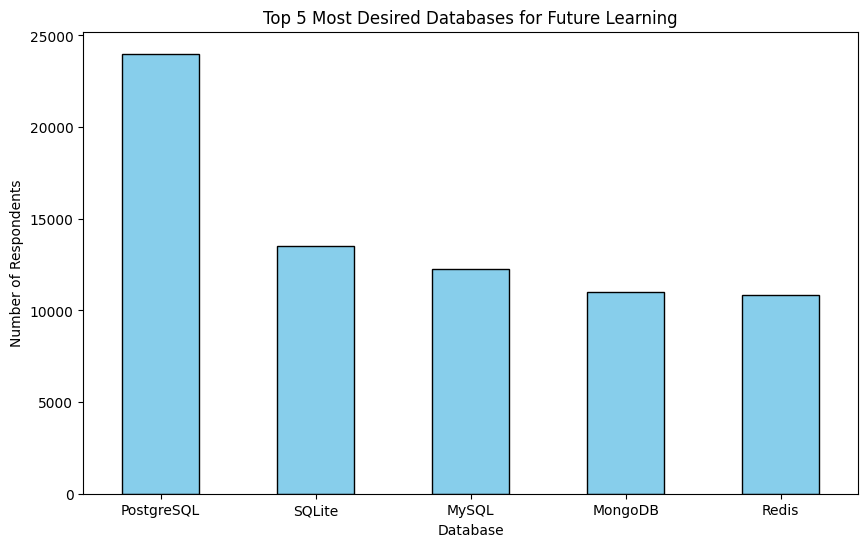

In [14]:
## Write your code here

# Load the DatabaseWantToWorkWith column
QUERY = "SELECT DatabaseWantToWorkWith FROM main"
df = pd.read_sql_query(QUERY, conn)

# Drop 'None' and missing entries
df = df[df['DatabaseWantToWorkWith'].notna() & (df['DatabaseWantToWorkWith'] != 'None')]

# Split entries by semicolon and flatten into a list
all_databases = df['DatabaseWantToWorkWith'].str.split(';').explode()

# Count top 5 most desired databases
top5 = all_databases.value_counts().head(5)

# Plot histogram (bar chart)
plt.figure(figsize=(10,6))
top5.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 Most Desired Databases for Future Learning')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


In [20]:
QUERY = """
SELECT RemoteWork
FROM main 
GROUP BY RemoteWork
ORDER BY RemoteWork
"""
df_remote = pd.read_sql_query(QUERY, conn)
print(df_remote)

                             RemoteWork
0                                  None
1  Hybrid (some remote, some in-person)
2                             In-person
3                                Remote


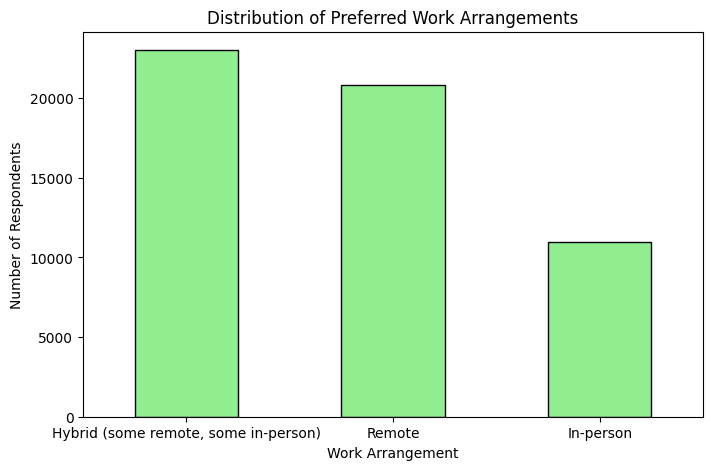

In [16]:
## Write your code here

# Load RemoteWork column
QUERY = "SELECT RemoteWork FROM main"
df = pd.read_sql_query(QUERY, conn)

# Drop missing or 'None' entries
df = df[df['RemoteWork'].notna() & (df['RemoteWork'] != 'None')]

# Count occurrences of each category
counts = df['RemoteWork'].value_counts()

# Plot bar chart
plt.figure(figsize=(8,5))
counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribution of Preferred Work Arrangements')
plt.xlabel('Work Arrangement')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


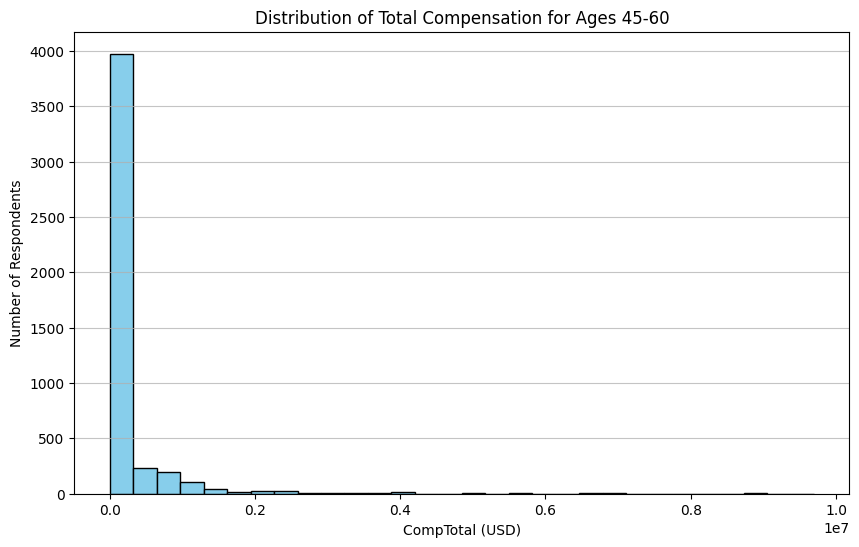

In [17]:
## Write your code here

# Load Age and CompTotal columns
QUERY = """
SELECT Age, CompTotal
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Filter for mid-career respondents (45-60 years)
age_groups = ['45-54 years old', '55-64 years old']
df_mid = df[df['Age'].isin(age_groups)]

# Drop missing or non-positive compensation values
df_mid = df_mid[df_mid['CompTotal'].notna() & (df_mid['CompTotal'] > 0)]

# Optionally, limit extremely large outliers for better visualization
df_mid = df_mid[df_mid['CompTotal'] < 1e7]  # adjust cutoff as needed

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(df_mid['CompTotal'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Compensation for Ages 45-60')
plt.xlabel('CompTotal (USD)')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', alpha=0.75)
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [19]:
QUERY = """
SELECT JobSat
FROM main 
GROUP BY JobSat
ORDER BY JobSat
"""
df_sat = pd.read_sql_query(QUERY, conn)
print(df_sat)

    JobSat
0      NaN
1      0.0
2      1.0
3      2.0
4      3.0
5      4.0
6      5.0
7      6.0
8      7.0
9      8.0
10     9.0
11    10.0


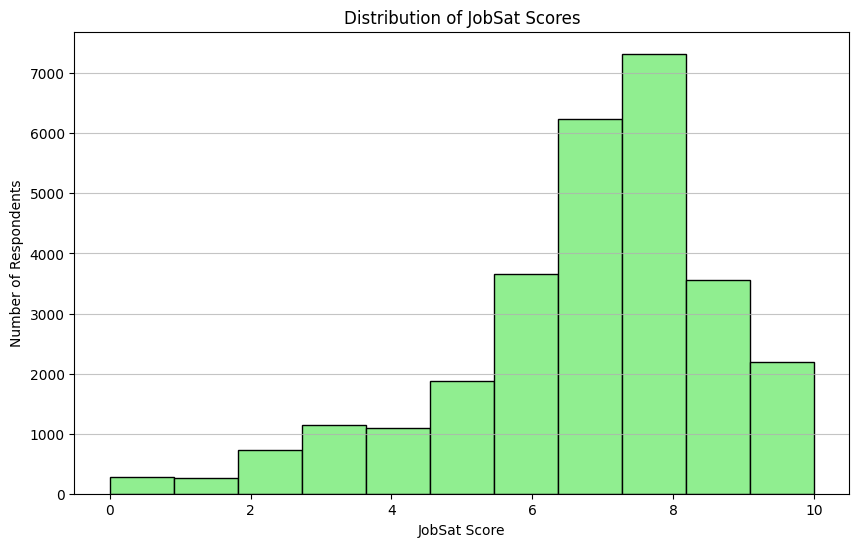

In [22]:
## Write your code here

# Load YearsCodePro and JobSat
QUERY = """
SELECT YearsCodePro, JobSat
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

# Map YearsCodePro to numeric values
years_map = {
    "Less than 1 year": 0.5,
    "More than 50 years": 51,
    "None": None
}
df['YearsCodePro_num'] = df['YearsCodePro'].replace(years_map)
df['YearsCodePro_num'] = pd.to_numeric(df['YearsCodePro_num'], errors='coerce')

# Drop rows with missing JobSat or YearsCodePro
df = df[df['JobSat'].notna() & df['YearsCodePro_num'].notna()]

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(df['JobSat'], bins=11, color='lightgreen', edgecolor='black')
plt.title('Distribution of JobSat Scores')
plt.xlabel('JobSat Score')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', alpha=0.75)
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [23]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
